In [1]:
import torch
from torch import nn
from torch.nn.parameter import Parameter
from torch.autograd import Variable


# define linear layer
class nn_Linear(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(nn_Linear, self).__init__()
        # create layer parameters
        self.weight = Parameter(torch.Tensor(output_dim, input_dim))
        self.bias = Parameter(torch.Tensor(1, output_dim))
        
        #initialize the weight and bias parameter using values
        self.weight.data.uniform_(-0.001, 0.001) # parameters have .data and .gradient values.
        self.bias.data.uniform_(-0.001, 0.001) # parameters have .data and .gradient values.
        
    # y = Wx + b    
    def forward(self, x):
        # Here you could try to see what values or sizes have these inputs.
        # print(self.weight.size())
        # print(x.size())
        
        # Note that this type of debugging is not usually possible in tensorflow/keras because
        # in those frameworks these operations only define a computation graph but are not operating
        # directly on values.
        
        batch_expanded_bias = self.bias.expand(x.size(0), self.bias.size(1))
        return torch.addmm(1, batch_expanded_bias.t(), 1, self.weight, x.t()).t()

In [2]:
# Let's create an instance of nn_linear
linear = nn_Linear(4,2)

In [3]:
# Let's define some input variable.
inputVar = Variable(torch.Tensor([[0.2, 0.3, -0.1, 0.2],
                                  [0.3, 0.1, 0.3, -0.4],
                                  [0.1, 0.2, 0.4, -0.4]]))

In [4]:
# Let's print some code output of the linear layer.
outputVar = linear(inputVar)
print(outputVar.data)   # This will contain y = Wx + b


1.00000e-04 *
 -4.5188 -8.3030
 -3.4798 -9.4413
 -1.7301 -9.2119
[torch.FloatTensor of size 3x2]



In [5]:
print(outputVar.grad)   # This will contain dy, the gradient of the output after backpropagation.

None


In [6]:
# This is to show how pytorch's magic. It registers parameters so you can easily traverse them.
print([param.size() for param in linear.parameters()])

[torch.Size([2, 4]), torch.Size([1, 2])]


In [7]:
class nn_MSECriterion(nn.Module):  # MSE = mean squared error.
    def forward(self, predictions, labels):
        return (predictions - labels).pow(2).sum()
    
inputs = Variable(torch.Tensor([[0.2, 0.3, -0.1, 0.2],
                               [0.3, 0.1, 0.3, -0.4],
                               [0.1, 0.2, 0.4, -0.4]]))

labels = Variable(torch.Tensor([[1, 1],
                                [2, 2],
                                [3, 3]]))

# Now optimize until the loss becomes small.
linear = nn_Linear(4, 2)
linear.train()  # Makes a difference when the module has dropout or batchnorm which behave different during testing.
for iteration in range(0, 50):
    predictions = linear(inputs) # forward pass.
    loss = nn_MSECriterion()(predictions, labels)  # loss function.
    loss.backward() # This backpropagates errors all-the-way.
    linear.weight.data.add_(-0.0001 * linear.weight.grad.data)  # SGD step.
    linear.bias.data.add_(-0.0001 * linear.bias.grad.data)  # SGD step.
    print(iteration, loss.data[0])

0 28.01202964782715
1 27.976383209228516
2 27.905189514160156
3 27.79864501953125
4 27.657047271728516
5 27.480791091918945
6 27.27036476135254
7 27.02635383605957
8 26.749433517456055
9 26.440378189086914
10 26.100046157836914
11 25.72937774658203
12 25.32940673828125
13 24.901247024536133
14 24.446083068847656
15 23.965185165405273
16 23.459880828857422
17 22.931581497192383
18 22.381752014160156
19 21.811914443969727
20 21.223655700683594
21 20.618610382080078
22 19.99845314025879
23 19.364906311035156
24 18.7197265625
25 18.064706802368164
26 17.401660919189453
27 16.732425689697266
28 16.058860778808594
29 15.382829666137695
30 14.706206321716309
31 14.030862808227539
32 13.358668327331543
33 12.691485404968262
34 12.031157493591309
35 11.379511833190918
36 10.738347053527832
37 10.109435081481934
38 9.494511604309082
39 8.895273208618164
40 8.313369750976562
41 7.7504048347473145
42 7.207927703857422
43 6.687428951263428
44 6.190337181091309
45 5.718015670776367
46 5.271756649017

In [8]:
import torchvision.models as models
alexnet = models.alexnet(pretrained = True)
print(alexnet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096,

In [9]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import json, string
%matplotlib inline

In [10]:
# 1. Define the appropriate image pre-processing function.
preprocessFn = transforms.Compose([transforms.Scale(256), 
                                   transforms.CenterCrop(224), 
                                   transforms.ToTensor(), 
                                   transforms.Normalize(mean = [0.485, 0.456, 0.406], 
                                                        std=[0.229, 0.224, 0.225])])


In [11]:
# 2. Load the imagenet class names.
imagenetClasses = {int(idx): entry[1] for (idx, entry) in json.load(open('imagenet_class_index.json')).items()}

In [12]:
# 3. Forward a test image of the toaster.
# Never forget to set in evaluation mode so Dropoff layers don't add randomness.
alexnet.eval()
# unsqueeze(0) adds a dummy batch dimension which is required for all models in pytorch.
image = Image.open('test_image.jpg').convert('RGB')
inputVar =  Variable(preprocessFn(image).unsqueeze(0))
predictions = alexnet(inputVar)

In [13]:
# 4. Decode the top 10 classes predicted for this image.
# We need to apply softmax because the model outputs the last linear layer activations and not softmax scores.
probs, indices = (-nn.Softmax()(predictions).data).sort()


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
probs = (-probs).numpy()[0][:10]; indices = indices.numpy()[0][:10]
preds = [imagenetClasses[idx] + ': ' + str(prob) for (prob, idx) in zip(probs, indices)]



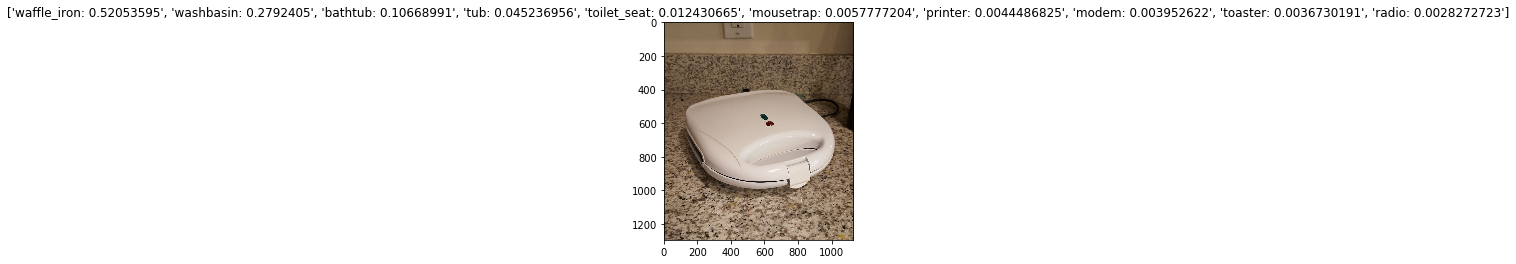

In [15]:
# 5. Show image and predictions
plt.title((preds))
plt.imshow(image);